<a href="https://colab.research.google.com/github/farhan19999/Classification-of-Transaction-Narration-Using-NLP/blob/master/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip -qq '/content/gdrive/MyDrive/VIS-DATA-SET/Transaction_Naration_Data_Set.zip'
!unzip -qq '/content/gdrive/MyDrive/VIS-DATA-SET/Test.zip'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./Transaction_Naration_Data_Set.csv')
print(data.head())

   Unnamed: 0    AC_ID    AMOUNT   DOC_DATE  \
0           0  3644877  342800.0  01-NOV-22   
1           1  1175256  342800.0  01-NOV-22   
2           2  2298226    1500.0  01-NOV-22   
3           3  4066427    1500.0  01-NOV-22   
4           4  1978564    2550.0  01-NOV-22   

                                            NARATION   DR_CR  
0                                      Cash Withdraw   Debit  
1                     Cash Withdrawal From A/C No.:   Credit  
2   Cash withdraw from Micro Merchant point, MM A/C    Debit  
3  Credit Against Merchant Cash Withdraw Service ...  Credit  
4   Cash withdraw from Micro Merchant point, MM A/C    Debit  


In [ ]:
naration = data[['NARATION']]
print(naration.shape[0])
print(naration.head())

22546758
                                            NARATION
0                                      Cash Withdraw
1                     Cash Withdrawal From A/C No.: 
2   Cash withdraw from Micro Merchant point, MM A/C 
3  Credit Against Merchant Cash Withdraw Service ...
4   Cash withdraw from Micro Merchant point, MM A/C 


In [ ]:
naration.loc[:,('NARATION')] = naration.loc[:,('NARATION')].str.lower()
naration.loc[:,('NARATION')] = naration.loc[:,('NARATION')].str.replace(r'[^a-z ]+','', regex = True)
naration.loc[:,('NARATION')] = naration.loc[:,('NARATION')].str.replace(r'[ ]+',' ', regex = True)
print(naration.head())

<ipython-input-6-461bd9e25bea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naration.loc[:,('NARATION')] = naration.loc[:,('NARATION')].str.lower()
<ipython-input-6-461bd9e25bea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naration.loc[:,('NARATION')] = naration.loc[:,('NARATION')].str.replace(r'[^a-z ]+','', regex = True)


                                            NARATION
0                                      cash withdraw
1                        cash withdrawal from ac no 
2     cash withdraw from micro merchant point mm ac 
3  credit against merchant cash withdraw service ...
4     cash withdraw from micro merchant point mm ac 


<ipython-input-6-461bd9e25bea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naration.loc[:,('NARATION')] = naration.loc[:,('NARATION')].str.replace(r'[ ]+',' ', regex = True)


In [ ]:
print(naration['NARATION'].describe())
print(naration['NARATION'].isnull().sum())

count                        22545735
unique                         107675
top       cash withdrawal from ac no 
freq                          2359719
Name: NARATION, dtype: object
1023


In [ ]:
#removing duplicate and null
naration = naration.drop_duplicates(subset=['NARATION']  ,keep='first')
naration = naration.drop(naration[naration['NARATION'] == ' '].index)
naration = naration.dropna(axis = 0 , how = 'any')

In [ ]:
print(naration['NARATION'].describe())
print(naration['NARATION'].isnull().sum())

count            107674
unique           107674
top       cash withdraw
freq                  1
Name: NARATION, dtype: object
0


In [ ]:
!python -m spacy download en_core_web_lg

2023-05-30 07:13:08.363966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 07:13:09.339666: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-30 07:13:11.075640: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-30 07:13:11.076223: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
import spacy
spacy.prefer_gpu()
nlp = spacy.load('en_core_web_lg')
tokens = []
counter = 0
test = naration.loc[:50000]
#print(test)
total = test.shape[0]

for sent in test['NARATION'] :
  tokens.append(nlp(str(sent)))
  counter+=1
  print('\rcompleted ',str(100*counter/total),'%', end='' )
  


completed  100.0 %

In [ ]:
print(test.shape)
print(tokens[:10])

(396, 1)
[cash withdraw, cash withdrawal from ac no , cash withdraw from micro merchant point mm ac , credit against merchant cash withdraw service from ac, cash deposit to ac no , cash deposit, debit for new atm card charge, debit against palli bidyut bill collection , agri agent commission of ac , inter agent cash withdraw]


In [ ]:
def word_freq_counter(sentence_list, sort=True, reverse=True) :
  words = {}
  for sent in sentence_list:
    for word in sent:
      word = str(word)
      if word not in words:
        words[word] = 0
      words[word]+=1
  if sort is True:
    words=sorted(words.items(), key=lambda x:x[1], reverse =reverse)
  return dict(words)

def word_histogram(word_list, no_item=20):
  fig, ax = plt.subplots()
  y_pos = np.arange(no_item)
  words = list(word_list.keys())[:no_item]
  freq = list(word_list.values())[:no_item]
  ax.barh(y_pos, freq,align = 'center')
  ax.set_yticks(y_pos, labels=words)
  ax.invert_yaxis()
  plt.show()
  

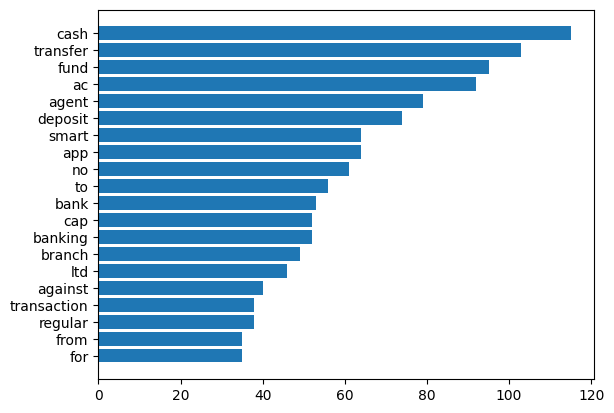

In [ ]:
freq_list = word_freq_counter(tokens)
word_histogram(dict(freq_list))

In [ ]:
import re
lemmatize_list = []

extra_sw = {'ac', 'mm'}

nlp.Defaults.stop_words |={'ac', 'mm'}

for word in extra_sw:
  nlp.vocab[word].is_stop = True


for token_list in tokens:
  token_str = []
  for token in token_list:
    ents = [e.text for e in token_list.ents]
    if nlp.vocab[token.lemma_].is_stop is True  or token.dep_ == 'prep' or token.lemma_ in ents or token.lemma_ == ' ' :
      continue
    token_str.append(token.lemma_)
  if len(token_str) == 0 :
    print(token_list)
  else: 
    lemmatize_list.append(token_str)

#tokens = lemmatize_list


shajib
adamdighi
barachowna
sanchay
usuf
dhainagar
sandpriti
remitance 


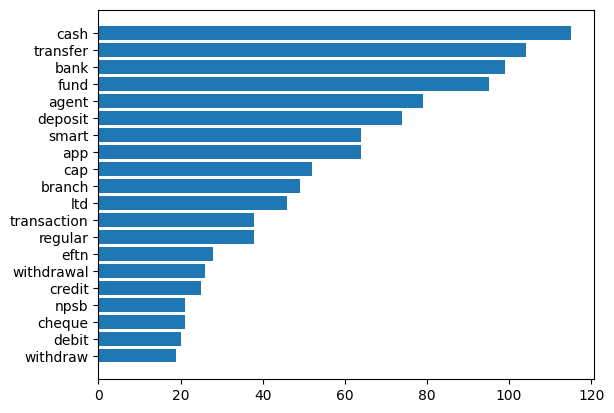

In [ ]:
word_histogram(word_freq_counter(lemmatize_list))

In [ ]:
list(word_freq_counter(lemmatize_list))

['cash',
 'transfer',
 'bank',
 'fund',
 'agent',
 'deposit',
 'smart',
 'app',
 'cap',
 'branch',
 'ltd',
 'transaction',
 'regular',
 'eftn',
 'withdrawal',
 'credit',
 'npsb',
 'cheque',
 'debit',
 'withdraw',
 'inter',
 'roll',
 'fr',
 'ba',
 'payment',
 'bazar',
 'pay',
 'collection',
 'remittance',
 'remit',
 'md',
 'bill',
 'islami',
 'balance',
 'card',
 'commission',
 'dps',
 'sonali',
 'trf',
 'hu',
 'salary',
 'banking',
 'akter',
 'bu',
 'loan',
 'installment',
 'service',
 'fee',
 'agrani',
 'october',
 'purpose',
 'road',
 'profit',
 'month',
 'merchant',
 'charge',
 'palli',
 'company',
 'account',
 'program',
 'sci',
 'self',
 'settlement',
 'asia',
 'dutchbangla',
 'bangldesh',
 'islam',
 'social',
 'net',
 'project',
 'vat',
 'sme',
 'request',
 'oct',
 'nps',
 'ad',
 'mohila',
 'unnaon',
 'dol',
 'alam',
 'allowance',
 'tk',
 'commercial',
 'refill',
 'premature',
 'encash',
 'ward',
 'rent',
 'pubali',
 'd',
 'c',
 'sumon',
 'personal',
 'hajar',
 'micro',
 'point',

In [ ]:
#feature extraction

import gensim

model = gensim.models.Word2Vec(sentences = lemmatize_list, min_count = 1)


In [ ]:
print(type(model.wv['micro']))

<class 'numpy.ndarray'>


In [ ]:
sentence_vec = []
for sent in lemmatize_list:
  vect = np.zeros(shape = model.wv['withdraw'].shape)
  for word in sent:
    vect += model.wv[word]
  sentence_vec.append((sent, vect/len(sent)))


<class 'tuple'>


In [ ]:
from sklearn.cluster import MiniBatchKMeans


def elbow_method(vector, start, end, plot = False) :
  tot_dist = []
  for i in range(start, end+1):
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', n_init='auto')
    kmeans.fit_predict(vector)
    tot_dist.append(kmeans.inertia_)
  
  if plot is True:
    cls_count = np.arange(start = start, stop = end+1, step =1)
    fig, ax = plt.subplots()
    ax.plot(cls_count, tot_dist, marker ='x')
    plt.show()

  return tot_dist 
    


<class 'numpy.ndarray'>


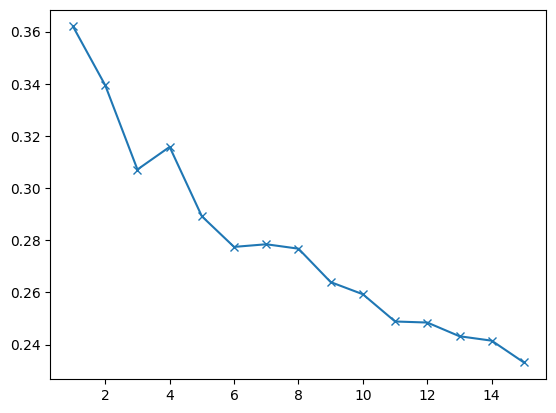

In [ ]:
#clustering
vector = [x[1] for x in sentence_vec]
dist = elbow_method(vector=vector, start=1, end = 15, plot = True)

From the Upper graph we can determine optimal nummber of cluster.

In [ ]:
n_clusters = 13
kmeans = MiniBatchKMeans(n_clusters=n_clusters, init='k-means++', n_init='auto')
labels = kmeans.fit_predict(vector)

In [ ]:
clusterd_data = {
    'lemmatize_list':lemmatize_list,
    'sentence_vec': vector,
    'labels' : labels,
}
clusterd_data = pd.DataFrame.from_dict(clusterd_data)
print(clusterd_data.head())

                                lemmatize_list  \
0                             [cash, withdraw]   
1                           [cash, withdrawal]   
2     [cash, withdraw, micro, merchant, point]   
3  [credit, merchant, cash, withdraw, service]   
4                              [cash, deposit]   

                                        sentence_vec  labels  
0  [0.0016875091241672635, 0.004030360898468643, ...       3  
1  [0.002863473375327885, 0.005731426470447332, 0...       3  
2  [-0.0001764976419508457, 0.0022925512166693807...       3  
3  [0.00017055096104741098, 0.002668382064439356,...       3  
4  [-0.00560748262796551, 0.0023596861283294857, ...      11  


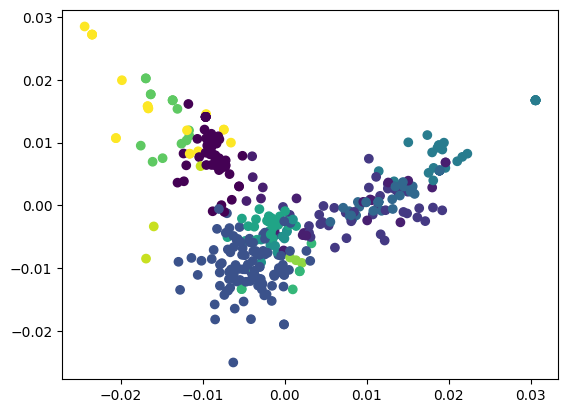

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

reduced_vec = pca.fit_transform(sentence_vec)

fig, ax = plt.subplots()

ax.scatter(reduced_vec[:,0], reduced_vec[:,1], c=labels)
plt.show()



In [ ]:
cluster_dict = {}
for label in labels:
  rows = clusterd_data[clusterd_data['labels'] == label]
  sents = rows['lemmatize_list']
  cluster_dict[label] = word_freq_counter(sents)


{'bazar': 7, 'aynatoly': 1, 'gharmora': 1, 'fulbaria': 1, 'chula': 1, 'lalitnagar': 1, 'outletgodagarira': 1, 'withdraw': 1, 'masud': 1, 'adampur': 1, 'bankra': 1}


In [ ]:
print(type(cluster_dict))
for key in cluster_dict:
  print('cluster ',key)
  print(value.keys)

<class 'dict'>
cluster  3
cluster  11
cluster  8
cluster  5
cluster  10
cluster  2
cluster  1
cluster  7
cluster  9
cluster  12
cluster  4
cluster  6
cluster  0
